## K-means from scratch

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [34]:
X,y = make_blobs(n_samples=1000, centers=5)
print (X.shape, y.shape)

((1000, 2), (1000,))


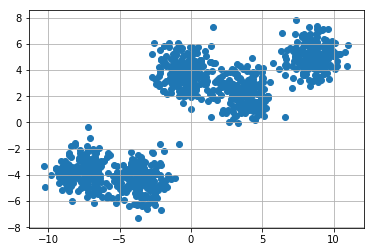

In [35]:
plt.figure()
plt.grid("on")
plt.scatter(X[:,0],X[:,1])
plt.show()

In [36]:
k = 5

colors = ['green','red','blue','orange', 'pink']

clusters = {}

for ix in range(k):
    centre = 10.0*(2*np.random.random((X.shape[1],)) - 1)
    points = []
    cluster = {
        
        "centre" : centre,
        "points" : points,
        "color"  : colors[ix]
    }
    clusters[ix] = cluster

print clusters

{0: {'color': 'green', 'points': [], 'centre': array([1.4166067 , 0.25566075])}, 1: {'color': 'red', 'points': [], 'centre': array([6.1742153 , 0.83379925])}, 2: {'color': 'blue', 'points': [], 'centre': array([4.5567232 , 4.54540463])}, 3: {'color': 'orange', 'points': [], 'centre': array([-1.60225643,  1.99719572])}, 4: {'color': 'pink', 'points': [], 'centre': array([5.7668315 , 4.87928637])}}


In [38]:
def dist(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

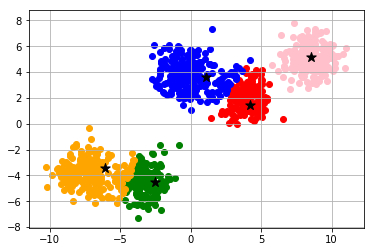

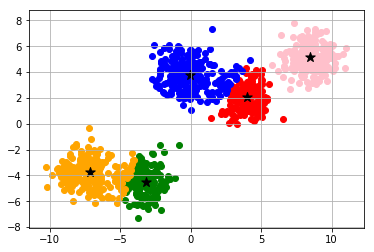

In [41]:
for ix in range(X.shape[0]):
    dis = []
    curr_p = X[ix]
    
    for kx in range(k):
        d = dist(curr_p, clusters[kx]["centre"])
        dis.append(d)
    
    current_cluster = np.argmin(dis)
    
    clusters[current_cluster]['points'].append(curr_p)
    
for kx in range(k):
    pts = np.array(clusters[kx]['points'])
    
    clusters[kx]['coords'] = pts

plt.figure(0)
plt.grid("on")

for kx in range(k):
    pts = clusters[kx]['coords']
    
    try:
        plt.scatter(pts[:,0],pts[:,1], color = clusters[kx]['color'])
    except:
        pass
    
    centre = clusters[kx]['centre']
    plt.scatter(centre[0],centre[1], color='black', s = 100, marker="*")

for kx in range(k):
    if clusters[kx]['coords'].shape[0]>0:
        new_centre = clusters[kx]['coords'].mean(axis=0)
    else:
        new_centre = clusters[kx]['centre']
    
    clusters[kx]['centre'] = new_centre
    clusters[kx]['points'] = []
    
plt.figure(1)
plt.grid("on")

for kx in range(k):
    pts = clusters[kx]['coords']
    
    try:
        plt.scatter(pts[:,0],pts[:,1], c = clusters[kx]['color'])
    except:
        pass
    
    centre = clusters[kx]['centre']
    plt.scatter(centre[0],centre[1], color='black', s = 100, marker="*")

## Using Sklearn

In [42]:
from sklearn.cluster import KMeans

In [45]:
kmeans = KMeans(n_clusters=5)

In [47]:
z = kmeans.fit_transform(X)

In [51]:
cen = kmeans.cluster_centers_

In [50]:
Y = kmeans.labels_

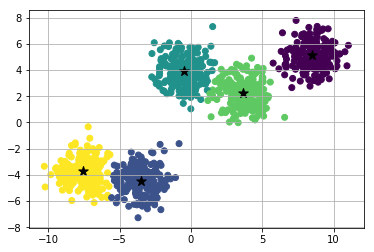

In [53]:
plt.figure()
plt.grid("on")

plt.scatter(X[:,0],X[:,1], c = Y)
plt.scatter(cen[:,0],cen[:,1], color = 'black', s = 100, marker="*")
plt.show()